# Web Scraping NBA Stats & Sentiment Analysis
This Notebook is created by Michael Gaynor

   A Couple weeks after the 2022 NBA Finals I wanted to see if this current 2022 Golden State Warriors team was a statically a better team, then the 2018 championship team. So, I decided to scrape the web for the data using Python libraries Beautiful Soup & Requests to obtain the most current and accurate dataset for my analysis. Once I began scrapping the data, I decided to make a second part to this project, with doing a sentiment analysis as well. 

# # Import Libraries

Import all of the libraries that are going to be used for this project. Also imported additional libraries along the project.

In [ ]:
# ## Importing the packages I will need for my analysis/ Project is comparing 2022 to the 2018 regular and playoff season 
from bs4 import BeautifulSoup 
import requests 
import pandas as pd 
import numpy as np 
import csv  
import tweepy
import json
import matplotlib.pyplot as plt 
import re


# # Web Scrapping 

I used requests & BeautifulSoup libraries to scrape the data.

In [2]:
# Making a request to GET data from html for 2022 playoff and regular season
url= 'https://www.basketball-reference.com/teams/GSW/2022.html#all_per_game-playoffs_per_game'
gsw_data = requests.get(url)
html_doc= gsw_data.text

In [3]:
# Extracting structruded data from html with BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')
# Pulling only the table Im working with 
gsw22_table = soup.find(id='playoffs_per_game')
gsw22_table_r = soup.find(id='per_game')

## Data Cleaning 
I created a dataframe for both years to access the data that was scraped fro the url. So it can be cleaned renamming a column to keep everything uniform. Also created two new columns to help distingush the different dataframes before I combined them into one. 

In [4]:
# Importing the html into a pandas dataframe. [0] only taking the first element 
gsw22_playoff = pd.read_html(str(gsw22_table))[0]
gsw22_per_game = pd.read_html(str(gsw22_table_r))[0]

# Renaming a column name to match the column 
gsw22_playoff.rename(columns={'Unnamed: 1':'Name'}, inplace = True)
gsw22_per_game.rename(columns={'Unnamed: 1':'Name'}, inplace = True)

# Creating a column year and season type to identify what year and season type the data falls in. 
gsw22_playoff['Year']= 2022
gsw22_per_game['Year']=2022

gsw22_playoff['Season']='Playoffs'
gsw22_per_game['Season']= 'Regular Season' 
gsw22_per_game.head()

,Rk,Name,Age,G,GS,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS/G,Year,Season
0,1,Stephen Curry,33,64,64,34.5,8.4,19.1,0.437,4.5,...,4.7,5.2,6.3,1.3,0.4,3.2,2.0,25.5,2022,Regular Season
1,2,Andrew Wiggins,26,73,73,31.9,6.5,14.0,0.466,2.2,...,3.3,4.5,2.2,1.0,0.7,1.5,2.2,17.2,2022,Regular Season
2,3,Jordan Poole,22,76,51,30.0,6.2,13.9,0.448,2.8,...,3.0,3.4,4.0,0.8,0.3,2.5,2.7,18.5,2022,Regular Season
3,4,Klay Thompson,31,32,32,29.4,7.7,17.9,0.429,3.6,...,3.4,3.9,2.8,0.5,0.5,1.3,1.7,20.4,2022,Regular Season
4,5,Draymond Green,31,46,44,28.9,2.9,5.6,0.525,0.3,...,6.3,7.3,7.0,1.3,1.1,3.0,3.0,7.5,2022,Regular Season


In [5]:
# Making a request to GET data from html for 2018 playoff 
url= 'https://www.basketball-reference.com/teams/GSW/2018.html#all_per_game-playoffs_per_game'
gsw_data_18 = requests.get(url)
html_doc18= gsw_data_18.text

# Extracting structruded data from html with BeautifulSoup
soup = BeautifulSoup(html_doc18, 'html.parser')

# Pulling only the table Im working with 
gsw18_table = soup.find(id='playoffs_per_game')
gsw18_table_r = soup.find(id ='per_game')

In [6]:
## Importing the html into a pandas dataframe. [0] only taking the first element 
gsw18_playoffs = pd.read_html(str(gsw18_table))[0]
gsw18_per_game = pd.read_html(str(gsw18_table_r))[0]

# Renaming a column name to match the column 
gsw18_playoffs.rename(columns={'Unnamed: 1':'Name'}, inplace=True)
gsw18_per_game.rename(columns={'Unnamed: 1':'Name'}, inplace=True)

# Creating a column 'year' to identify what year the data falls in.
gsw18_playoffs['Year']= 2018
gsw18_per_game['Year']=2018

gsw18_playoffs['Season']='Playoffs'
gsw18_per_game['Season']= 'Regular Season' 

gsw18_per_game.head()

,Rk,Name,Age,G,GS,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS/G,Year,Season
0,1,Klay Thompson,27,73,73,34.3,7.9,16.2,0.488,3.1,...,3.4,3.8,2.5,0.8,0.5,1.8,1.6,20.0,2018,Regular Season
1,2,Kevin Durant,29,68,68,34.2,9.3,18.0,0.516,2.5,...,6.4,6.8,5.4,0.7,1.8,3.0,2.0,26.4,2018,Regular Season
2,3,Draymond Green,27,70,70,32.7,4.0,8.8,0.454,1.1,...,6.6,7.6,7.3,1.4,1.3,2.9,2.6,11.0,2018,Regular Season
3,4,Stephen Curry,29,51,51,32.0,8.4,16.9,0.495,4.2,...,4.4,5.1,6.1,1.6,0.2,3.0,2.2,26.4,2018,Regular Season
4,5,Andre Iguodala,34,64,7,25.3,2.3,5.0,0.463,0.5,...,3.1,3.8,3.3,0.8,0.6,1.0,1.5,6.0,2018,Regular Season


# Combining All of the dataframes 
Inspected the data for missing values and filled the in with zeros.

In [7]:
# Merging both dataframes together and addining a year column 
gsw = pd.concat([gsw18_per_game,gsw18_playoffs, gsw22_per_game,gsw22_playoff],ignore_index= False)

gsw.shape

(63, 30)

In [8]:
# Checking to see if there are any missing values 
gsw.isna().sum()

Rk        0
Name      0
Age       0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       4
2P        0
2PA       0
2P%       1
eFG%      0
FT        0
FTA       0
FT%       2
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS/G     0
Year      0
Season    0
dtype: int64

In [9]:
# Replacing the NAN with 0.000 players are not know for shooting 3s
gsw['3P%'] = gsw['3P%'].fillna(0.000)
gsw['2P%'] = gsw['2P%'].fillna(0.000)
gsw['FT%'] = gsw['FT%'].fillna(0.000)

# Counting how many duplicates I have
duplicates = gsw.duplicated().sum()
duplicates

0

# Data Manipulation

In [11]:
# seeing the average games the three players played in by season an year
name = gsw['Name'].isin(['Draymond Green','Klay Thompson','Stephen Curry'])
gsw[name].groupby(['Year','Season','Name'])['G'].mean()

Year  Season          Name          
2018  Playoffs        Draymond Green    21.0
                      Klay Thompson     21.0
                      Stephen Curry     15.0
      Regular Season  Draymond Green    70.0
                      Klay Thompson     73.0
                      Stephen Curry     51.0
2022  Playoffs        Draymond Green    22.0
                      Klay Thompson     22.0
                      Stephen Curry     22.0
      Regular Season  Draymond Green    46.0
                      Klay Thompson     32.0
                      Stephen Curry     64.0
Name: G, dtype: float64

In [12]:
# Seeing the field goal percentage for the playofs and the regular season 
gsw[name].groupby(['Year','Season','Name'])['FG%'].mean()

Year  Season          Name          
2018  Playoffs        Draymond Green    0.432
                      Klay Thompson     0.465
                      Stephen Curry     0.451
      Regular Season  Draymond Green    0.454
                      Klay Thompson     0.488
                      Stephen Curry     0.495
2022  Playoffs        Draymond Green    0.479
                      Klay Thompson     0.429
                      Stephen Curry     0.459
      Regular Season  Draymond Green    0.525
                      Klay Thompson     0.429
                      Stephen Curry     0.437
Name: FG%, dtype: float64

In [13]:
#checking to see the 3PA for playoffs and regular season 
gsw[name].groupby(['Year','Season','Name'])['3PA'].mean()

Year  Season          Name          
2018  Playoffs        Draymond Green     3.8
                      Klay Thompson      7.5
                      Stephen Curry     10.8
      Regular Season  Draymond Green     3.7
                      Klay Thompson      7.1
                      Stephen Curry      9.8
2022  Playoffs        Draymond Green     1.8
                      Klay Thompson      9.1
                      Stephen Curry     10.4
      Regular Season  Draymond Green     1.2
                      Klay Thompson      9.3
                      Stephen Curry     11.7
Name: 3PA, dtype: float64

In [14]:
# Checking to see the 3p% for the playoffs and regular season 
gsw[name].groupby(['Year','Season','Name'])['3P%'].mean()

Year  Season          Name          
2018  Playoffs        Draymond Green    0.266
                      Klay Thompson     0.427
                      Stephen Curry     0.395
      Regular Season  Draymond Green    0.301
                      Klay Thompson     0.440
                      Stephen Curry     0.423
2022  Playoffs        Draymond Green    0.205
                      Klay Thompson     0.385
                      Stephen Curry     0.397
      Regular Season  Draymond Green    0.296
                      Klay Thompson     0.385
                      Stephen Curry     0.380
Name: 3P%, dtype: float64

In [15]:
# Checking to see the pts/G for the playoffs and regular season 
gsw[name].groupby(['Year','Season','Name'])['PTS/G'].mean()

Year  Season          Name          
2018  Playoffs        Draymond Green    10.8
                      Klay Thompson     19.6
                      Stephen Curry     25.5
      Regular Season  Draymond Green    11.0
                      Klay Thompson     20.0
                      Stephen Curry     26.4
2022  Playoffs        Draymond Green     8.0
                      Klay Thompson     19.0
                      Stephen Curry     27.4
      Regular Season  Draymond Green     7.5
                      Klay Thompson     20.4
                      Stephen Curry     25.5
Name: PTS/G, dtype: float64

In [16]:
# Saving the dataframe to a csv file.
gsw.to_csv('gsw_games.csv')

# Tweets Mining 
Created a twitter developer account to get the private keys. Then setting up the keys as variables to gain access to the twitter API. 

In [17]:

# Setting up my keys to access twitter api
access_token = '1464967868928434183-BQpmO1x9B6ae1Q5dMDqbIoLK7KBlCu'
access_secret = 'CfRY83qMxgwNexvvDGCmURUEMSux8cIthAl0uxQQHMRCq'
consumer_key ='1UGQIS0kbAxJPqJXxSQ2AADLa'
consumer_secret = 'pfU5oQd0YAnwLhZwjE8mecvvcBqoZGVHNUYQNuT3aOmpQr4gGC'

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

# Creating seach queries 

In [18]:
# Setting up the keyword to search for and filtering out retweets. 
keywords= 'Steph Curry-filter:retweets AND -filter:replies AND -filter:links'


# Creating a list to store the twitter data in. 
id_str = []
user = []
coordinates  = []
time=[]
retweet_count = []
favorite_count = []
text= []


# Created a loop to pull tweets to get the full_text of the tweet. 
for tweet in tweepy.Cursor(api.search_tweets,q=keywords,lang='en',count=833, 
                           tweet_mode = "extended", until = '2022-07-11').items(625):
    id_str.append(tweet.id_str)
    user.append(tweet.user)
    coordinates .append(tweet.coordinates )
    time.append(tweet.created_at)
    retweet_count.append(tweet.retweet_count)
    favorite_count.append(tweet.favorite_count)
    text.append(tweet.full_text)
    
# Created a dataframe 
steph_tweets = pd.DataFrame({'id_str': id_str,'user': user,'coordinates':coordinates ,
                           'time':time,'retweet_count':retweet_count,'favorite_count':favorite_count, 'text':text})
steph_tweets.to_csv('steph_tweets.csv')

In [19]:
# Setting up the keyword to search for and filtering out retweets. 
keywords= 'klay Thompson-filter:retweets AND -filter:replies AND -filter:links'

# Creating a list to store the twitter data in. 
id_str = []
user = []
coordinates  = []
time=[]
retweet_count = []
favorite_count = []
text= []

# Created a loop to pull tweets to get the full_text of the tweet. 
for tweet in tweepy.Cursor(api.search_tweets,q=keywords,lang='en',count=833, 
                           tweet_mode = "extended", until = '2022-07-11').items(625):
    id_str.append(tweet.id_str)
    user.append(tweet.user)
    coordinates .append(tweet.coordinates )
    time.append(tweet.created_at)
    retweet_count.append(tweet.retweet_count)
    favorite_count.append(tweet.favorite_count)
    text.append(tweet.full_text)
    
# Created a dataframe 
klay_tweets = pd.DataFrame({'id_str': id_str,'user': user,'coordinates':coordinates ,
                           'time':time,'retweet_count':retweet_count,'favorite_count':favorite_count, 'text':text})
# Saving tweets to a csv file
klay_tweets.to_csv('klay_tweets.csv')

In [20]:
# Setting up the keyword to search for and filtering out retweets. 
keywords= 'Draymond Green-filter:retweets AND -filter:replies AND -filter:links'

# Creating a list to store the twitter data in. 
id_str = []
user = []
coordinates  = []
time=[]
retweet_count = []
favorite_count = []
text= []

# Created a loop to pull tweets to get the full_text of the tweet. 
for tweet in tweepy.Cursor(api.search_tweets,q=keywords,lang='en',
                            count=833, tweet_mode = "extended", until = '2022-07-11').items(625):
    
    id_str.append(tweet.id_str)
    user.append(tweet.user)
    coordinates .append(tweet.coordinates )
    time.append(tweet.created_at)
    retweet_count.append(tweet.retweet_count)
    favorite_count.append(tweet.favorite_count)
    text.append(tweet.full_text)
    
# Created a dataframe 
draymond_tweets = pd.DataFrame({'id_str': id_str,'user': user,'coordinates':coordinates ,
                           'time':time,'retweet_count':retweet_count,'favorite_count':favorite_count, 'text':text})
# Saving tweets to a csv file
draymond_tweets.to_csv('draymond_tweets.csv')

In [21]:
# Setting up the keyword to search for and filtering out retweets. 
keywords= '#GoldenStateWarriors-filter:retweets AND -filter:replies AND -filter:links'

# Creating a list to store the twitter data in. 
id_str = []
user = []
coordinates  = []
time=[]
retweet_count = []
favorite_count = []
text= []

# Created a loop to pull tweets to get the full_text of the tweet. 
for tweet in tweepy.Cursor(api.search_tweets,q=keywords,lang='en',
                            count=833, tweet_mode = "extended", until = '2022-07-11').items(625):
    
    id_str.append(tweet.id_str)
    user.append(tweet.user)
    coordinates .append(tweet.coordinates )
    time.append(tweet.created_at)
    retweet_count.append(tweet.retweet_count)
    favorite_count.append(tweet.favorite_count)
    text.append(tweet.full_text)
    
# Created a dataframe 
GoldenState_tweets = pd.DataFrame({'id_str': id_str,'user': user,'coordinates':coordinates ,
                           'time':time,'retweet_count':retweet_count,'favorite_count':favorite_count, 'text':text})
# Saving tweets to a csv file
GoldenState_tweets.to_csv('GoldenState_tweets.csv')

In [22]:
#Bringing all three dataframes together under one dataframe. 
# Creating a column to identify the key word used for the search 

steph_tweets['key_word']= 'Steph Curry'
klay_tweets['key_word']= 'Klay Thompson'
draymond_tweets['key_word']= 'Draymond Green' 
GoldenState_tweets['key_word']= 'Team Tweets'
gsw_tweets = pd.concat([steph_tweets,klay_tweets,draymond_tweets,GoldenState_tweets],axis=0, ignore_index=True)

In [23]:
# Clean the tweets and drop colunns that have missing data 
gsw_tweets.shape

(1300, 8)

# Data Cleaning 

In [24]:
# Checking to see if there are any missing values. 
gsw_tweets.isna().any()

id_str            False
user              False
coordinates        True
time              False
retweet_count     False
favorite_count    False
text              False
key_word          False
dtype: bool

In [25]:
gsw_tweets['coordinates'].fillna('No Location')

0       No Location
1       No Location
2       No Location
3       No Location
4       No Location
           ...     
1295    No Location
1296    No Location
1297    No Location
1298    No Location
1299    No Location
Name: coordinates, Length: 1300, dtype: object

In [26]:
# Checking to see how man duplicates I have in my dataframe
gsw_tweets.duplicated('id_str').sum()

17

In [27]:
# Droping the duplicated data 
gsw_tweets = gsw_tweets.drop_duplicates('id_str')

In [28]:
# Checking to see if the duplicates were droped
gsw_tweets.duplicated('id_str').sum()

0

In [46]:

# joing the text together so it can just be one big text 
tweets = gsw_tweets['text'].str.cat(sep='')


# Tweets Processing 
Turned the tweets in 'tokens 'in NLTK library and removed all non-alphanumeric characters within the tokens. Then used WordNetLemmatizer to get the base root of each word along with adjectives. Placed the lemmatized tokens into a word cloud using library WordCloud. To get the sentiment score for every row I used the library Textblob along with a function to retrieve and store the scores. Made a function to count all of the positive, negative, and neutral scores and created scatter and bar plots to visualize the data. I further manipulated the data to gain additional insights. 

In [30]:
from nltk import word_tokenize 
from nltk.stem import WordNetLemmatizer
tweets = re.sub(r'[^\w\s]', '',str(tweets))
# Removing all non-alphnumric characters 
word_token = word_tokenize(tweets)



In [31]:
# Lemmatization the tweets to get the root words along with adjectives 
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
root_tokens =wnl.lemmatize(str(word_token),pos='a')

In [32]:
# Setting my stopwords to apply to the word cloud 
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["Golden","State","really","amp","kendrick","Perkins","time","one","Im","people","got","think","year","na","wa","dont","yall","steph","stephn","curry","draymond","green","shit","klay","Thompson","man","talk",
                "basketball","stephen","didnt","thing","guy","bro", "warriors","warrior","player","game","i", "me", "my", "myself",
                  "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself",
                  "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which",
                  "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had",
                  "having", "do", "does", "did", "doing", "a", "an",
                  "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", 
                  "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", 
                  "again", "further", "then", "once",
                  "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", 
                  "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])

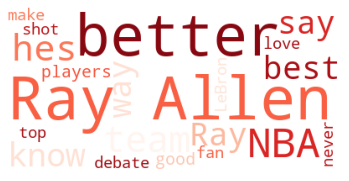

In [33]:
# Making a word cloud to see the ost frequent words 
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords,max_words = 20,colormap = 'Reds'). generate(root_tokens.replace("'",''))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('WordCloud.jpeg')
plt.show()

In [34]:
# Created a function to get the sentiment score for each row in the dataframe
from textblob import TextBlob 

def senti(x):
    return TextBlob(x).sentiment     

gsw_tweets['sentiment'] = gsw_tweets['text'].apply(senti)
print(gsw_tweets['sentiment'].head())

def polarity(y):
    return TextBlob(y).sentiment.polarity

gsw_tweets['polarity'] = gsw_tweets['text'].apply(polarity)

def subjectivity(q):
    return TextBlob(q).sentiment.subjectivity

gsw_tweets['subjectivity'] = gsw_tweets['text'].apply(subjectivity)

0                                   (0.0, 0.0)
1                                   (0.5, 0.5)
2                                  (0.15, 0.1)
3                    (0.6000000000000001, 0.9)
4    (0.12976190476190474, 0.5642857142857144)
Name: sentiment, dtype: object


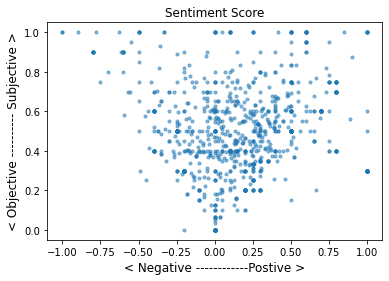

In [35]:
# plot with a scatter plot the distrubtion of the sentiment scores
x = gsw_tweets['polarity']
y = gsw_tweets['subjectivity']
plt.scatter(x,y,s=10,alpha = 0.5)
plt.ylabel('< Objective ---------- Subjective >', fontsize=12)
plt.xlabel('< Negative ------------Postive >',fontsize=12)
plt.title('Sentiment Score')
plt.savefig('sentiment_scatter.jpeg')
plt.show()

In [36]:
# Creating a function to count the postive, negative, and neutral values

def value_count(x):
    if x > 0:
        return "Postive"
    elif x==0:
        return "Neutral"
    else:
        return "Negative"
    
gsw_tweets['analysis'] = gsw_tweets['polarity'].apply(value_count)

In [37]:
gsw_tweets['analysis'].value_counts()

Postive     610
Neutral     391
Negative    282
Name: analysis, dtype: int64

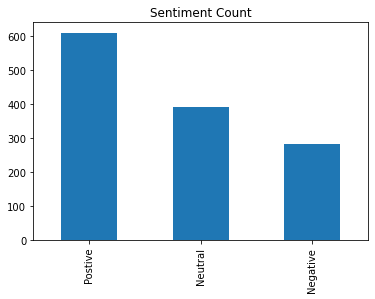

In [38]:
# Creating a bar chart to compare the distribution of postive, netural, and negative tweets

gsw_tweets['analysis'].value_counts().plot(kind="bar")
plt.savefig('Sentiment Count.jpeg')
plt.title('Sentiment Count')
plt.show()

In [39]:
# See which tweet was liked the most likes
sort = gsw_tweets.sort_values(['favorite_count'], ascending = False)
sort.iloc[[0],[5,6]]

,favorite_count,text
302,19779,what’s some of the most overused rap bars/line...


In [40]:
# see which tweet was retewwte the most 
retweet = gsw_tweets.sort_values(['retweet_count'], ascending = False)
retweet.iloc[[0],[4,6]]

,retweet_count,text
996,805,Maturing is realizing Ray Allen is better than...


In [42]:
# Saving dataframe to a csv file.
gsw_tweets.to_csv('gsw_tweets.csv')

In [43]:
# Getting the sum of likes
gsw_tweets['favorite_count'].sum()


94956

In [44]:
#  Getting the sum of retweets
gsw_tweets['retweet_count'].sum()

5488

In [45]:
# Checking to see how many postive, neutral, and negative each player got.
gsw_tweets.groupby('key_word')['analysis'].value_counts()

key_word        analysis
Draymond Green  Negative     88
                Postive      53
                Neutral       6
Klay Thompson   Postive     249
                Neutral     165
                Negative     85
Steph Curry     Postive     302
                Neutral     215
                Negative    108
Team Tweets     Postive       6
                Neutral       5
                Negative      1
Name: analysis, dtype: int64